# Olympic History

Olympic games started from 1896. First olypic games happen in Athens and last game happen in Rio (2016).

Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998

**Inspiration**

This dataset provides an opportunity to ask questions about how the Olympics have evolved over time, including questions about the participation and performance of women, different nations, and different sports and events.

In [78]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_style('whitegrid')

## Read Datasets

In [4]:
# Read datasets
athlete_events = '/Users/nilvarshney/Google Drive/Machine Learning/PythonML/Datasets/athlete_events.csv'
noc_regions = '/Users/nilvarshney/Google Drive/Machine Learning/PythonML/Datasets/noc_regions.csv'
olympic = pd.read_csv(athlete_events)
noc = pd.read_csv(noc_regions)

## Exploratory Data Analysis

In [5]:
olympic.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [6]:
noc.head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


**Missing value summaries**

In [16]:
print('Missing Value counts \n{}'.format(olympic.isna().sum()[olympic.isna().sum() > 0]))

Missing Value counts 
Age         9474
Height     60171
Weight     62875
Medal     231333
dtype: int64


Let fill the missing Medal value to 'No Medal'

In [19]:
olympic['Medal'] = olympic['Medal'].fillna('No Medal')

In [23]:
olympic_noc = pd.merge(olympic,noc,how='left',on = 'NOC')

In [93]:
olympic_Summer = olympic_noc[olympic_noc.Season == 'Summer']
olympic_Winter = olympic_noc[olympic_noc.Season == 'Winter']

**No of Participants by year**

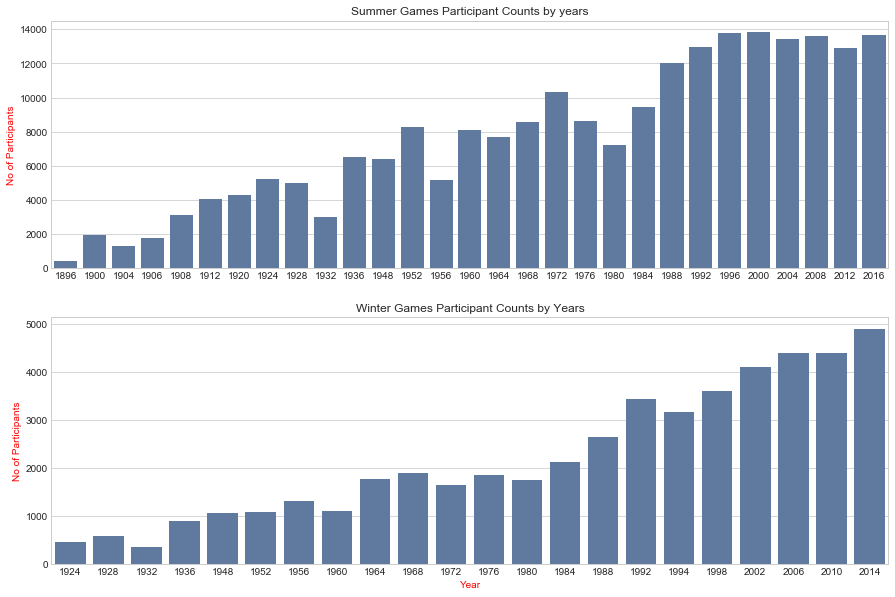

In [116]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 10))
t_data = olympic_Summer.groupby(['Year']).count()
sns.barplot(x = t_data.index,y = 'ID', data = t_data,color="#5577aa",ax = ax1)
ax1.set_xlabel('')
ax1.set_ylabel('No of Participants', color= 'r')
ax1.set_title('Summer Games Participant Counts by years')
t_data = olympic_Winter.groupby(['Year']).count()
sns.barplot(x = t_data.index,y = 'ID', data = t_data,color="#5577aa",ax = ax2)
ax2.set_xlabel('Year', color= 'r')
ax2.set_ylabel('No of Participants', color= 'r')
ax2.set_title('Winter Games Participant Counts by Years')
plt.show()

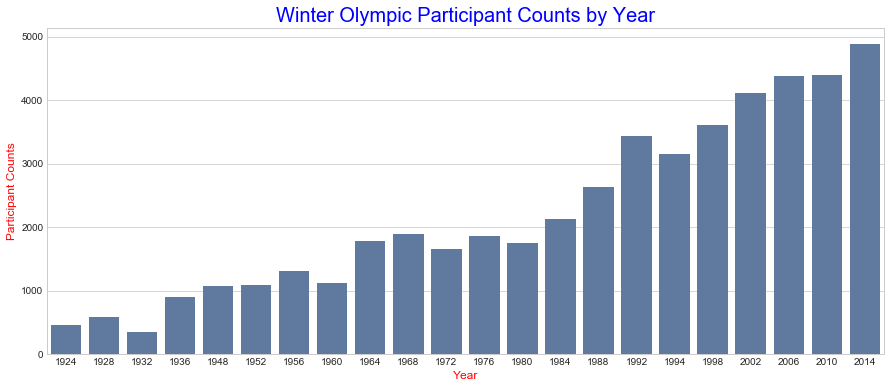

In [95]:
f, ax = plt.subplots(figsize=(15, 6))
t_data = olympic_Winter.groupby(['Year']).count()
sns.barplot(x = t_data.index,y = 'ID', data = t_data,color="#5577aa")
plt.title('Winter Olympic Participant Counts by Year', fontsize = 20, color='b')
plt.xlabel('Year', fontsize = 12, color='r')
plt.ylabel('Participant Counts', fontsize = 12, color='r')
plt.show()

[]

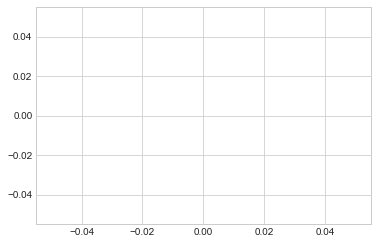

In [96]:
plt.plot(x = t_data.index,y = t_data['ID'])